<a href="https://colab.research.google.com/github/HumayDS/Digital-Data-Analytics-spring-2024-/blob/main/Lesson_3__DDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Activate package
import numpy as np
import pandas as pd

In [2]:
##Getting dataset
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Digital-Data-Analytics-spring-2024-/main/tips_2.csv')

In [3]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         241 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df.isnull().sum()

total_bill    0
tip           3
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,241.0,3.490415,4.665933,1.00,2.0000,2.920,3.7100,50.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.247719,0.598315
tip,0.247719,1.000000,0.084956
size,0.598315,0.084956,1.000000


In [9]:
#Unique values
df.nunique()

total_bill    229
tip           122
gender          2
smoker          2
day             4
time            2
size            6
dtype: int64

In [10]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [11]:
  #working with types
  df['gender'] = df['gender'].astype('category')
  df['smoker'] = df['smoker'].astype('category')
  df['day'] = df['day'].astype('category')
  df['time'] = df['time'].astype('category')
  df['size'] = df['size'].astype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         241 non-null    float64 
 2   gender      244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [13]:
# Adding new column
df["average_bill"] = df["total_bill"] / df["size"]
df.head()

,total_bill,tip,gender,smoker,day,time,size,average_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,NaN,Female,No,Sun,Dinner,4,6.147500


In [14]:
#  drop average bill

df.drop(columns=["average_bill"], inplace=True)
df.head()


,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4


In [15]:
#  create column if size > 2 , write 'less', 'more'

df['size_category'] = np.where(df['size'] > 2, 'more', 'less')


In [16]:
df.head()

,total_bill,tip,gender,smoker,day,time,size,size_category
0,16.99,1.01,Female,No,Sun,Dinner,2,less
1,10.34,1.66,Male,No,Sun,Dinner,3,more
2,21.01,3.50,Male,No,Sun,Dinner,3,more
3,23.68,3.31,Male,No,Sun,Dinner,2,less
4,24.59,NaN,Female,No,Sun,Dinner,4,more


In [17]:
df.drop('size_category' , axis = 1 ,inplace = True)

In [18]:
#  create column, if size < 2 , write 'less' between 2 and 5 , write 'orta', else 'chox'

df['size_category'] = np.select(
    [df['size'] < 2, (df['size'] >= 2) & (df['size'] < 5), df['size'] >= 5],
    ['less', 'orta', 'chox']
)

df.head()


,total_bill,tip,gender,smoker,day,time,size,size_category
0,16.99,1.01,Female,No,Sun,Dinner,2,orta
1,10.34,1.66,Male,No,Sun,Dinner,3,orta
2,21.01,3.50,Male,No,Sun,Dinner,3,orta
3,23.68,3.31,Male,No,Sun,Dinner,2,orta
4,24.59,NaN,Female,No,Sun,Dinner,4,orta


In [19]:
df.drop('size_category' , axis = 1 ,inplace = True)

In [20]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4


In [21]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4


In [22]:

df.sort_values(by='tip', ascending = False)

,total_bill,tip,gender,smoker,day,time,size
179,34.63,50.0,Male,Yes,Sun,Dinner,2
110,14.00,42.0,Male,No,Sat,Dinner,2
24,19.82,36.0,Male,No,Sat,Dinner,2
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
92,5.75,1.0,Female,Yes,Fri,Dinner,2
67,3.07,1.0,Female,Yes,Sat,Dinner,1
4,24.59,NaN,Female,No,Sun,Dinner,4
25,17.81,NaN,Male,No,Sat,Dinner,4


In [23]:

# select 0 : 3
df.iloc[0:3]

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [24]:

#select rows 0:3 , columns 0:2
df.iloc[:3,:2]


,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50


In [25]:
#FIltering
df.iloc[20:40 , 2]

20      Male
21    Female
22    Female
23      Male
24      Male
25      Male
26      Male
27      Male
28      Male
29    Female
30      Male
31      Male
32    Female
33    Female
34      Male
35      Male
36      Male
37    Female
38      Male
39      Male
Name: gender, dtype: category
Categories (2, object): ['Female', 'Male']

In [26]:
#filtering
df.iloc[20 , 2]

'Male'

In [27]:
# tip > 5
df[df.tip > 5]

,total_bill,tip,gender,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
24,19.82,36.00,Male,No,Sat,Dinner,2
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
88,24.71,5.85,Male,No,Thur,Lunch,2
110,14.00,42.00,Male,No,Sat,Dinner,2
116,29.93,5.07,Male,No,Sun,Dinner,4


In [28]:
# prompt: filter tip > 5 and total_bill < 20
## and --->>> &
### or ----->> |
df[(df['tip'] > 5) & (df['total_bill'] < 20)]


,total_bill,tip,gender,smoker,day,time,size
24,19.82,36.00,Male,No,Sat,Dinner,2
110,14.00,42.00,Male,No,Sat,Dinner,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2


In [29]:
#check nulls
df.isnull().sum()

total_bill    0
tip           3
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

In [30]:
# Filter where tip is null

df[df['tip'].isnull()]


,total_bill,tip,gender,smoker,day,time,size
4,24.59,NaN,Female,No,Sun,Dinner,4
25,17.81,NaN,Male,No,Sat,Dinner,4
79,17.29,NaN,Male,No,Thur,Lunch,2


In [31]:
# delete nulls
df_1 = df.dropna()

In [32]:
df_1.shape
df_1.isnull().sum()

total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: ylabel='Frequency'>

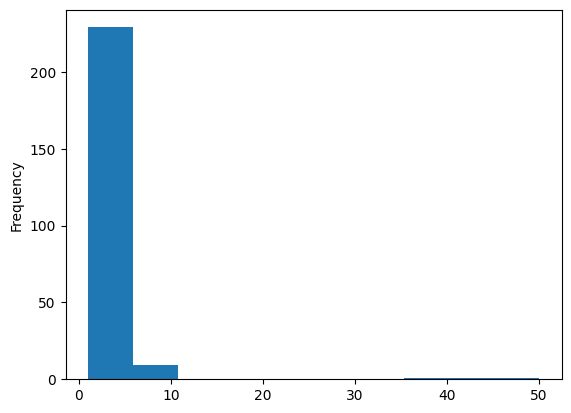

In [33]:
#histogram tip

df['tip'].plot.hist(bins=10)


In [34]:
# skewness tip

df['tip'].skew()


7.9535924021294395

<Axes: ylabel='Frequency'>

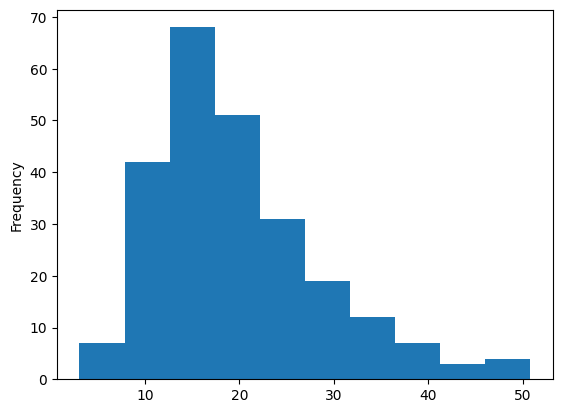

In [35]:
#  histogram total bill

df['total_bill'].plot.hist(bins=10)


<Axes: >

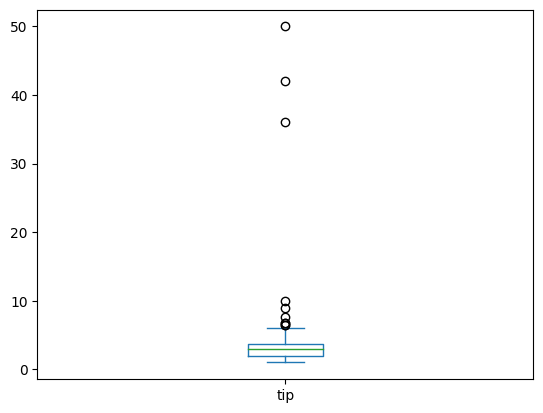

In [36]:
#  boxplot tip

df['tip'].plot.box()


In [37]:
# skewness total_bill

df['total_bill'].skew()


1.1332130376158205

In [38]:
#fill with 0
df.fillna(0)

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,0.00,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [39]:
#  df fill na's with mean

df.fillna(df.mean())


<ipython-input-39-1d1cfb6411bd>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.010000,Female,No,Sun,Dinner,2
1,10.34,1.660000,Male,No,Sun,Dinner,3
2,21.01,3.500000,Male,No,Sun,Dinner,3
3,23.68,3.310000,Male,No,Sun,Dinner,2
4,24.59,3.490415,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.920000,Male,No,Sat,Dinner,3
240,27.18,2.000000,Female,Yes,Sat,Dinner,2
241,22.67,2.000000,Male,Yes,Sat,Dinner,2
242,17.82,1.750000,Male,No,Sat,Dinner,2


In [40]:
# fill na's with median

df  = df.fillna(df.median())


<ipython-input-40-0b2ce0f2aaef>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df  = df.fillna(df.median())


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,3.483402,4.637470,1.00,2.0000,2.920,3.6875,50.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [42]:
##Outlier bounds for tip
IQR = df['tip'].quantile(0.75) - df['tip'].quantile(0.25)
lower_limit = df['tip'].quantile(0.25) - 2 * IQR
upper_limit = df['tip'].quantile(0.75) + 2 * IQR
print(lower_limit)
print(upper_limit)

-1.375
7.0625


In [43]:
df[(df['tip']  < lower_limit ) | (df['tip'] > upper_limit)]

,total_bill,tip,gender,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
24,19.82,36.00,Male,No,Sat,Dinner,2
110,14.00,42.00,Male,No,Sat,Dinner,2
170,50.81,10.00,Male,Yes,Sat,Dinner,3
179,34.63,50.00,Male,Yes,Sun,Dinner,2
212,48.33,9.00,Male,No,Sat,Dinner,4


In [44]:
q3 = df['tip'].quantile(0.75)

In [45]:
df.loc[(df['tip'] < lower_limit) | (df['tip'] > upper_limit), 'tip'] = q3

In [46]:
##Outlier bounds for tip
IQR = df['total_bill'].quantile(0.75) - df['total_bill'].quantile(0.25)
lower_limit = df['total_bill'].quantile(0.25) - 1.5 * IQR
upper_limit = df['total_bill'].quantile(0.75) + 1.5 * IQR
print(lower_limit)
print(upper_limit)

-2.8224999999999945
40.29749999999999


In [47]:
df[(df['total_bill']  < lower_limit ) | (df['total_bill'] > upper_limit)]

,total_bill,tip,gender,smoker,day,time,size
59,48.27,6.7300,Male,No,Sat,Dinner,4
102,44.30,2.5000,Female,Yes,Sat,Dinner,3
142,41.19,5.0000,Male,No,Thur,Lunch,5
156,48.17,5.0000,Male,No,Sun,Dinner,6
170,50.81,3.6875,Male,Yes,Sat,Dinner,3
182,45.35,3.5000,Male,Yes,Sun,Dinner,3
184,40.55,3.0000,Male,Yes,Sun,Dinner,2
197,43.11,5.0000,Female,Yes,Thur,Lunch,4
212,48.33,3.6875,Male,No,Sat,Dinner,4


In [48]:
q3 = df['total_bill'].quantile(0.75)

In [49]:
df.loc[(df['total_bill'] < lower_limit) | (df['total_bill'] > upper_limit), 'total_bill'] = q3

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,18.995236,7.368476,3.07,13.3475,17.795,24.091875,40.17
tip,244.0,2.940553,1.217166,1.00,2.0000,2.920,3.681875,6.73
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.000000,6.00


In [51]:
df.corr()

<ipython-input-51-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.612373,0.581834
tip,0.612373,1.000000,0.496077
size,0.581834,0.496077,1.000000


<Axes: ylabel='Frequency'>

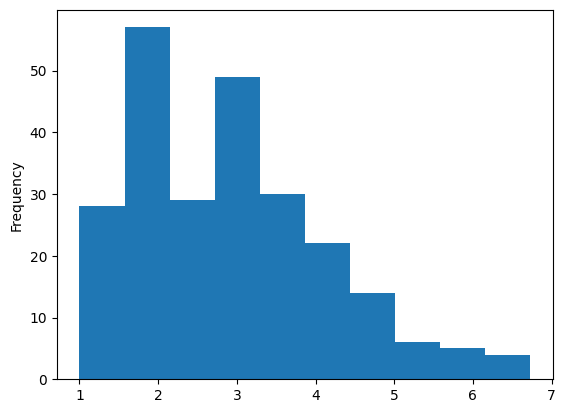

In [52]:
#Histogram tip again

df['tip'].plot.hist(bins=10)


In [53]:
#  skewness tip again

df['tip'].skew()


0.7920051611741294

<Axes: >

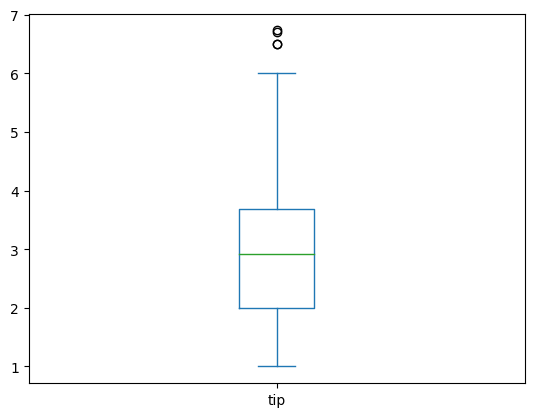

In [54]:
#  boxplot tip

df['tip'].plot.box()
